#### Peter Martigny

# Question 1

Given coefficients $\alpha$ and $\beta$, the probability distribution functions for the $Gamma(\alpha, \beta)$, the $inverseGamma(\alpha, \beta)$ and the $Beta(\alpha, \beta)$ are given by:

$f(x) = \frac{\beta^\alpha x^{\alpha - 1} e^{-x\beta}}{\Gamma(\alpha)}$

$g(x) = \frac{\beta^\alpha x^{-\alpha - 1} e^{-\frac{\beta}{x}}}{\Gamma(\alpha)}$

$h(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}$

Hence we have:

$log(f(x)) = \alpha log(\beta) + (\alpha - 1)log(x) - x\beta - log(\Gamma(\alpha))$

$log(g(x)) = \alpha log(\beta) - (\alpha + 1)log(x) - \frac{\beta}{x} - log(\Gamma(\alpha))$

$log(h(x)) = log(\Gamma(\alpha + \beta)) - log(\Gamma(\alpha)) - log(\Gamma(\beta)) + (\alpha - 1)log(x) + (\beta - 1)log(1 - x)$

In [1]:
from scipy.special import gammaln
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def log_gamma(x, a, b):
    return a*np.log(b) + (a - 1)*np.log(x) - x*b - gammaln(a)

def log_inverse_gamma(x, a, b):
    return a*np.log(b) - (a + 1)*np.log(x) - b/x - gammaln(a)

def log_beta(x, a, b):
    return gammaln(a + b) - gammaln(a) - gammaln(b) + (a - 1)*np.log(x) + (b - 1)*np.log(1 - x)

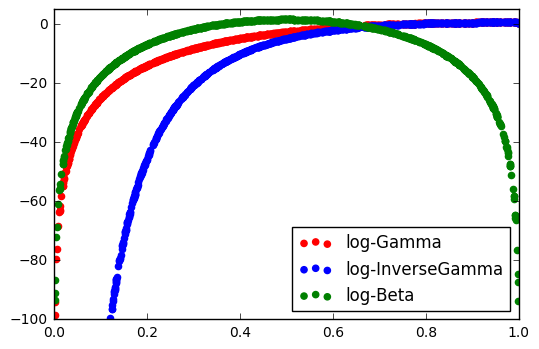

In [3]:
a, b = (20, 20)
x = np.random.uniform(0, 1, size = 1000)
gamma = log_gamma(x, a, b)
inverse_gamma = log_inverse_gamma(x, a, b)
beta = log_beta(x, a, b)

plt.scatter(x, gamma, color = 'r', label = 'log-Gamma')
plt.scatter(x, inverse_gamma, color = 'b', label = 'log-InverseGamma')
plt.scatter(x, beta, color = 'g', label = 'log-Beta')
plt.xlim(0, 1)
plt.ylim(-100, 5)
plt.legend(loc = 4)

# Question 2

The exponential distribution is defined as: 

$\epsilon(x; \lambda) = \frac{1}{\lambda}e^{-\frac{x}{\lambda}}$

This expression may be rewritten as: 

$\epsilon(x; \lambda) = \frac{(\frac{1}{\lambda})^1x^{1 - 1}e^{-x\frac{1}{\lambda}}}{\Gamma(1)}$

Hence, we notice that we have: 

$\epsilon(x; \lambda) = Gamma(x, 1, \frac{1}{\lambda})$

The exponential distribution is a special case of the Gamma distrbution, with $\alpha = 1$ and $\beta = \frac{1}{\lambda}$

# Question 3

Let's define $Z \sim Gamma(z; a, 1)$, $V = bZ$ and $\lambda = \frac{1}{V}$ with a and b strictly positive known constants.

Let's compute the marginal distributions of $V$ and $\lambda$.

We have: 

$\int_{0}^{\infty} f_{Gamma(z; a, 1)}(x) dx = 1$

Then, we have: 

$\int_{0}^{\infty} f_{V}(v) dv = 1$. With the change of variables $v = bz$ we obtain: 

$\int_{0}^{\infty} f_{V}(v) dv = \int_{0}^{\infty} f_{V}(bz) bdz$

Thus, we have: 

$f_{V}(bz)b = f_{Gamma(z; a, 1)}(z)$ for all z

It follows that: 

$f_{V}(v) = \frac{f_{Gamma(z; a, 1)}(\frac{v}{b})}{b}$

With the same methodology, we have: 

$\int_{0}^{\infty} f_{L}(\lambda) d\lambda = \int_{0}^{\infty} \frac{f_{L}(\frac{1}{v})}{v^2}dv$

Hence we have: 
 
$\frac{f_{L}(\frac{1}{v})}{v^2} = f_{V}(v)$ for all v strictly positive.

It follows that:

$f_{L}(v) = \frac{f_{V}(\frac{1}{v})}{v^2}$, which yelds: 

$f_{L}(\lambda) = \frac{f_{Gamma(z; a, 1)}(\frac{1}{\lambda b})}{\lambda^2b}$

# Question 4

The Generalized Gamma distribution is given by: 

$GG(v; \alpha, \beta, c) = \frac{|c|}{\Gamma(\alpha)\beta^{c\alpha}}v^{c\alpha - 1}e^{-(\frac{v}{\beta})^c}$

With $c = 1$ we have the usual Gamma disteribution.

#### 1) Is the GG distribution an exponential? If so, give the canonical parameters and the sufficient statisticss.

Let's try to write $GG$ as an exponential family. We have: 

$GG(v; \alpha, \beta, c) = e^{log(|c|) - log(\Gamma(\alpha)) - c\alpha log(\beta) +(c\alpha - 1)log(v) -(\frac{v}{\beta})^c }$

Let's denote by $A(\theta)$ the opposite of the part which only depends on the parameters in the exponential functions, ie: 

$A(\theta) = -(log(|c|) - log(\Gamma(\alpha)) - c\alpha log(\beta))$

We then have: 

$GG(v; \alpha, \beta, c) = e^{(c\alpha - 1)log(v) -(\frac{v}{\beta})^c - A(\theta)}$

We observe that the part which depends on $v$ is not linear with respect to functional of $v$, which means that we cannot write $(c\alpha - 1)log(v) -(\frac{v}{\beta})^c$ as $\theta^T . \psi(v)$.

Thus, the generalized gamma distribution is an exponential family only when $c = 1$.

Remark: We notice that the non linear part may be rewritten as an infinite sum of linear components with respect to functionals of $v$

#### 2) Verify that the inverse Gamma distribution and Gamma are special cases. Give the corresponding settings of the power parameter.

We've already observed that for $c = 1$, we have a Gamma distribution.

We now observe that for $c = -1$, we obtained an Inverse Gamma distribution.

#### 3) Show that if $v \sim  GG(v; \alpha, \beta, c)$ and $z = (\frac{v}{\beta})^c$, then z has the standard $G(z; \alpha, 1)$ distribution. Using this fact and a function that samples from standard gamma, implement a function that generates random samples from a generalized Gamma distribution

Following the same method as in question 3) , we have: 

$\int_{0}^{\infty}f_Z(z)dz = \int_{0}^{\infty}f_Z((\frac{v}{\beta})^c)\frac{cv^{c - 1}}{\beta^c}dv$

Hence, we have: 

$f_Z((\frac{v}{\beta})^c)\frac{cv^{c - 1}}{\beta^c} = f_V(v)$ for all v strictly positive.

After rearranging the terms, we obtain: 

$f_Z(z) = \frac{z^{\alpha - 1}}{\Gamma(\alpha)}e^{-z}$

Hence, Z has the standard $G(z; \alpha, 1)$ distribution.

Nnow, let's define a function that generates samples from a generalized Gamma distribution. We first generate a sample from the $G(z; \alpha, 1)$ distribution, and we use the change of variables $z = (\frac{v}{\beta})^c$ to generate our desired sample.

In [4]:
from numpy.random import gamma
def GG(a, b, c, N):
    aux = gamma(a, 1/b, size = N)
    aux = np.exp(aux)
    aux = b * aux ** (1/c)
    return aux

Let's plot the histogram

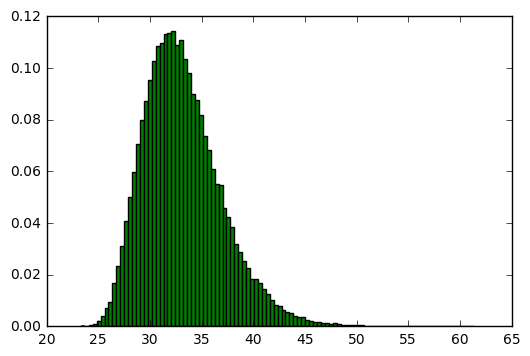

In [5]:
a, b, c, N = (20, 20, 2, 100000)
X = GG(a, b, c, N)
plt.hist(X, bins=100, normed=True, color = 'g')
plt.show()

# Question 5

#### 1) Draw the directed, undirected graphical models and the factor graph

In [6]:
import networkx as nx

Directed graph

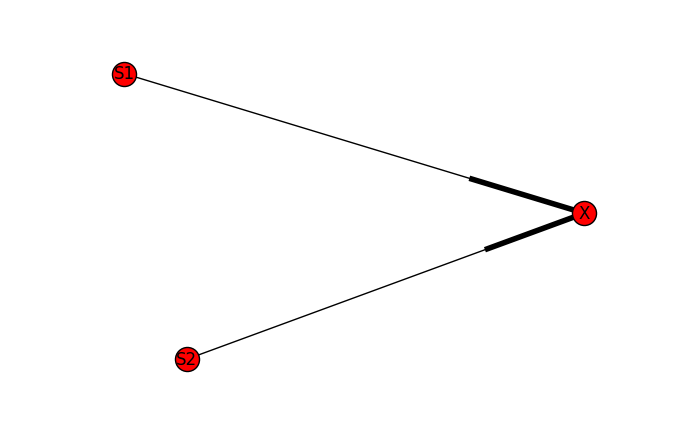

In [7]:
G=nx.DiGraph()
G.add_node("S1")
G.add_node("S2")
G.add_node("X")
G.add_edge("S1", "X")
G.add_edge("S2", "X")
nx.draw(G, with_labels = True)

Undirected graph

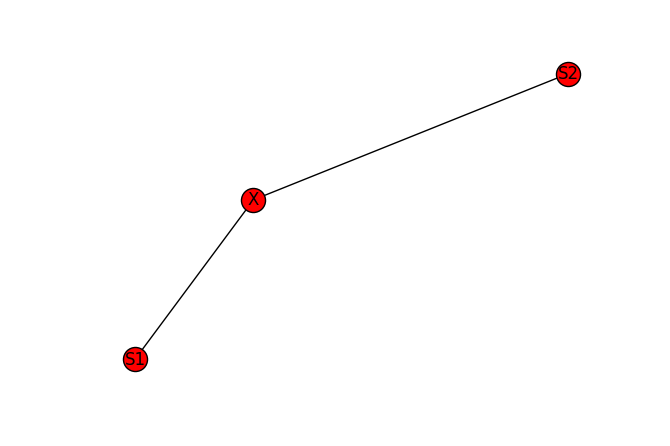

In [8]:
G=nx.Graph()
G.add_node("S1")
G.add_node("S2")
G.add_node("S1")
G.add_node("S2")
G.add_node("X")
G.add_edge("S1", "X")
G.add_edge("S2", "X")
nx.draw(G, with_labels = True)

Factor graph

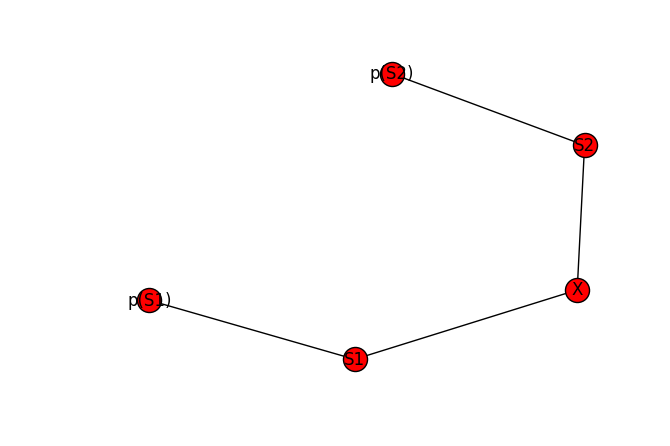

In [9]:
G=nx.Graph()
G.add_node("p(S1)")
G.add_node("p(S2)")
G.add_node("S1")
G.add_node("S2")
G.add_node("X")
G.add_edge("p(S1)", "S1")
G.add_edge("p(S2)", "S2")
G.add_edge("S1", "X")
G.add_edge("S2", "X")
nx.draw(G, with_labels = True)

#### 2) Find $p(s_1, s_2 | x)$

We have: $p(s_1, s_2 | x) \propto p(x | s_1, s_2)p(s_1)p(s_2)$

Hence we have: 

$p(s_1, s_2 | x) \propto e^{-\frac{1}{2}(x - (s_1 + s_2))^2 - \frac{1}{2}s_1^2 - \frac{1}{2}s_2^2}$

Let's define: 

$S = (s_1, s_2)^T$, $X = \frac{1}{2}(x, x)^T$ and  J = \begin{array}{ccc}
1 & 1 \\
1 & 1 \end{array}

Then, we have: 

$(S - X)^TJ(S - X) = S^TJS - 2S^TJX + X^TJX$

We have then: 

$p(S | x) \propto e^{-\frac{1}{2}(S - X)^TJ(S - X)}$

The proportionality coefficient ie equal to $\int e^{\frac{1}{2}(S - X)^TJ(S - X)} P(dS)$

#### 3) Suppose we observe $x = 9$. Plot the posterior $p(s_1, s_2 | x = 9)$.

In [10]:
def z_func(x,y):
    return np.exp(-(1/2) * (81 - 18*(x + y) + 2*(x**2 + y**2 + x*y)))

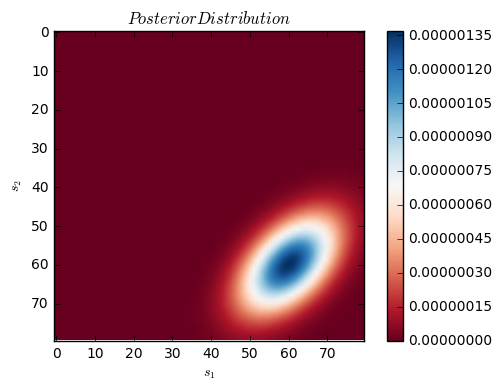

In [11]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
x = arange(-3.0,5.0,0.1)
y = arange(-3.0,5.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z_func(X, Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu)
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im)
title('$Posterior Distribution$')
plt.xlabel('$s_1$')
plt.ylabel('$s_2$')
show()

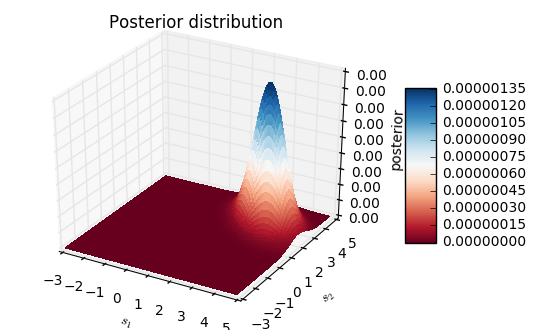

In [12]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Posterior distribution')
plt.xlabel('$s_1$')
plt.ylabel('$s_2$')
ax.set_zlabel('posterior')
plt.show()